In [244]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [245]:
df = pd.read_csv("weather_classification_data.csv")
df.shape

(13200, 11)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [247]:
df.head(8)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy


In [248]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


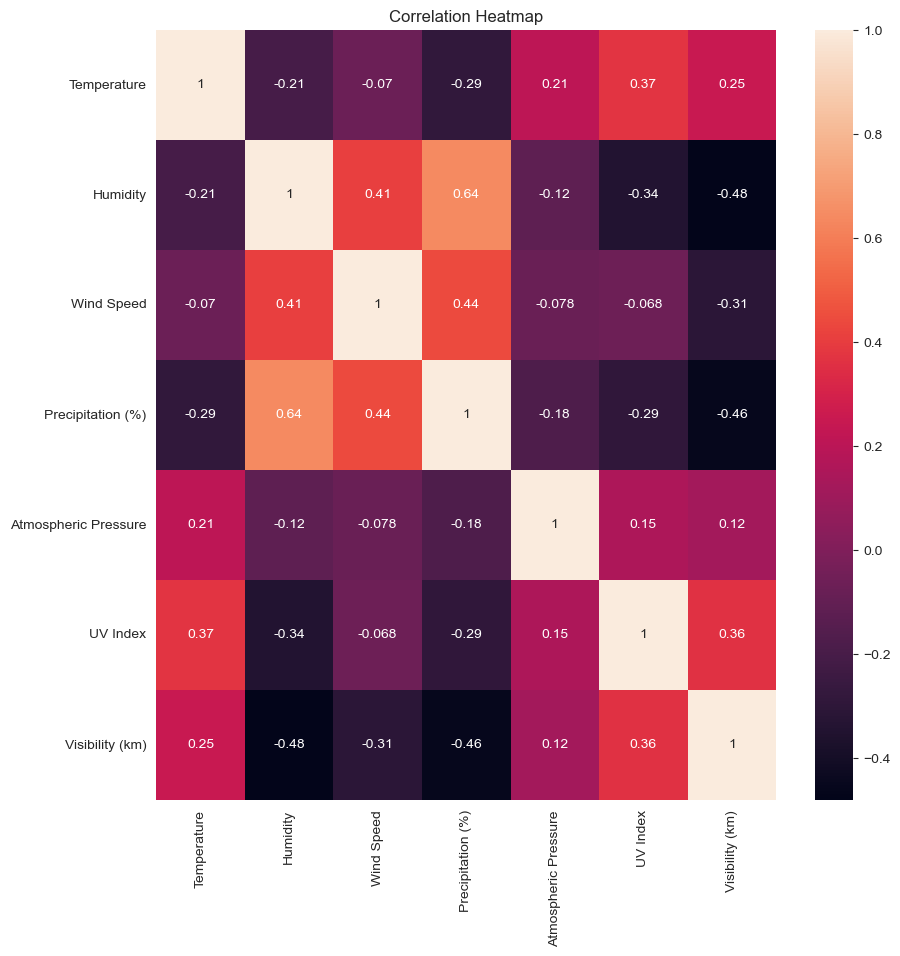

In [249]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [250]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## Handling Categorical Features with Label Encoding

In [251]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Weather Type'] = le.fit_transform(df['Weather Type'].fillna('none'))
df['Cloud Cover'] = le.fit_transform(df['Cloud Cover'].fillna('none'))
df['Season'] = le.fit_transform(df['Season'].fillna('none'))



# Identify and exclude non-numeric columns

In [252]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns excluded:", non_numeric_columns)

numeric_df = df[numeric_columns]


Non-numeric columns excluded: Index(['Location'], dtype='object')


#### Add a Weather Index (combined feature)

In [253]:
df['Weather_Index'] = df['Cloud Cover'] + df['Precipitation (%)']

#### Interaction Terms (combine features)

In [254]:
df['Humidity_Temp'] = df['Humidity'] * df['Temperature']

#### Log Transformation (for skewed data)

In [255]:
df['Log_Humidity'] = np.log1p(df['Humidity'])

#### Polynomial Features for non-linear relationships

In [256]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(df[['Wind Speed']]) 
df['Wind_Speed^2'] = polynomial_features[:, 1]

In [268]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = ['Humidity', 'Precipitation (%)', 'Cloud Cover', 'Visibility (km)', 'Atmospheric Pressure','Temperature']
df[scaled_features] = scaler.fit_transform(df[scaled_features])


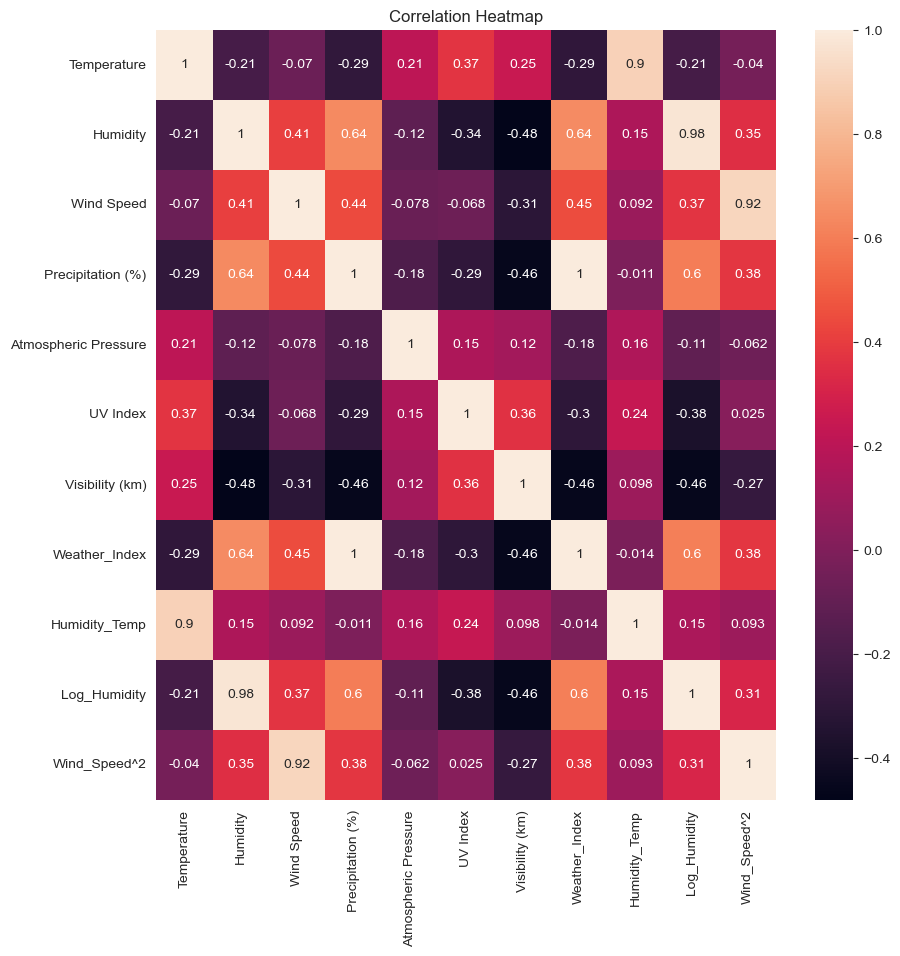

In [257]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [258]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Weather_Index,Humidity_Temp,Log_Humidity,Wind_Speed^2
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,inland,1,85.0,1022.0,4.304065,90.25
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,inland,0,74.0,3744.0,4.574711,72.25
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,mountain,3,16.0,1920.0,4.174387,49.00
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,coastal,3,82.0,3154.0,4.430817,2.25
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,mountain,1,68.0,1998.0,4.317488,289.00


# Exploratory analysis and plots

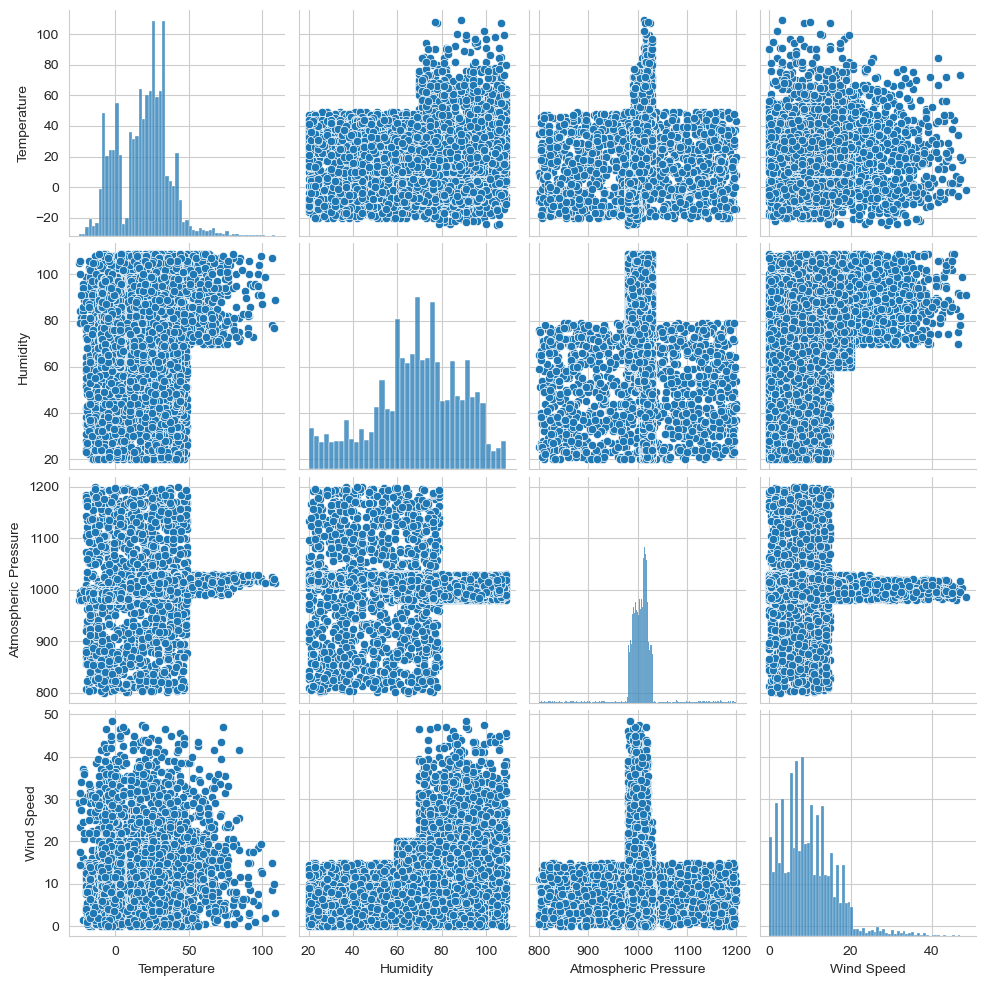

In [259]:
sns.pairplot(df[['Temperature', 'Humidity', 'Atmospheric Pressure', 'Wind Speed']])
plt.show()

#### Check the relative size of classifications

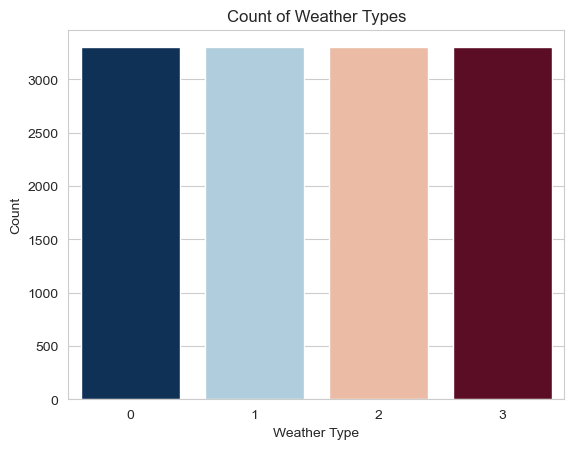

In [260]:
sns.set_style('whitegrid')
sns.countplot(
    x='Weather Type', 
    data=df, 
    hue='Weather Type', 
    palette='RdBu_r', 
    legend=False  
)
plt.title('Count of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

### feature selection

In [269]:
from sklearn.model_selection import train_test_split

x=df[['Temperature','UV Index', 'Precipitation (%)', 'Visibility (km)', 'Cloud Cover']]
y = df['Weather Type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=82)


In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Calassification Models**

#### logistic

In [271]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(x_train_scaled, y_train)


y_lg_pred = log_reg.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.872

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       837
           1       0.86      0.89      0.87       820
           2       0.92      0.93      0.92       864
           3       0.87      0.83      0.85       779

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300



Precision (macro): 0.8708584162473663
Recall (macro): 0.8704783827602708


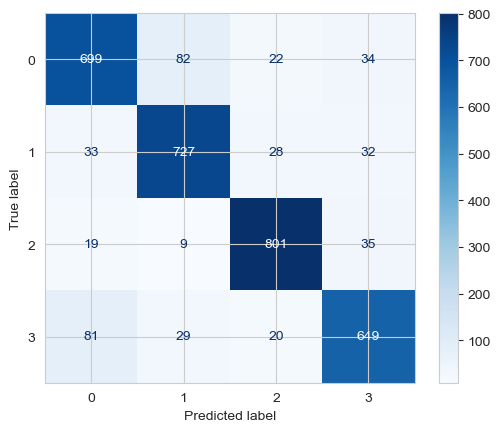

In [272]:
#samia
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Precision (macro):", precision_score(y_test, y_lg_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_lg_pred, average='macro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_lg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [273]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg, x, y, cv=7).mean()

0.8563633755354968

#### knn

In [134]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Splitting the data
xk_train, xk_test, yk_train, yk_test = train_test_split(x, y, test_size=0.3, random_state=332)

# Standardizing the features
scaler = StandardScaler()
xk_train_scaled = scaler.fit_transform(xk_train)
xk_test_scaled = scaler.transform(xk_test)

# Training the KNN model
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
knn.fit(xk_train_scaled, yk_train)

# Test accuracy
y_pred_knn = knn.predict(xk_test_scaled)
print("KNN Test Accuracy:", accuracy_score(yk_test, y_pred_knn))

# Train accuracy
y_pred_train = knn.predict(xk_train_scaled)
print("KNN Train Accuracy:", accuracy_score(yk_train, y_pred_train))



KNN Test Accuracy: 0.908080808080808
KNN Train Accuracy: 0.9248917748917749


In [135]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xk_train,yk_train)
    pred_i = knn.predict(xk_test)
    error_rate.append(np.mean(pred_i != yk_test))

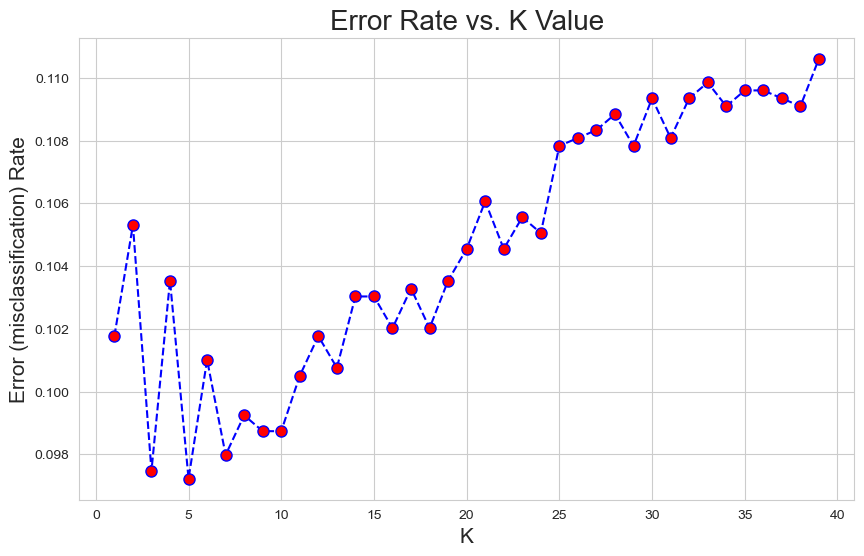

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)
plt.show()

In [137]:
df['Weather Type'].value_counts()

Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64

#### SVC

SVC Accuracy: 0.9103030303030303
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       837
           1       0.88      0.92      0.90       820
           2       0.95      0.93      0.94       864
           3       0.92      0.90      0.91       779

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300

Cross-validated Accuracy: 0.9008056023024961


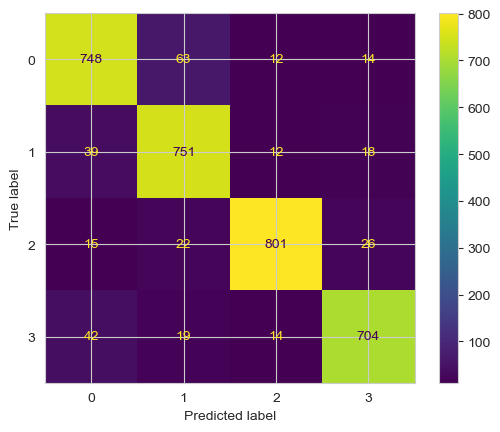

In [274]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_scaled, y_train)
y_pred_svc = svc.predict(x_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(conf_matrix).plot()

# Cross-validation score
cv_scores = cross_val_score(svc, x_train_scaled, y_train, cv=7)
print(f"Cross-validated Accuracy: {cv_scores.mean()}")


#### Desission Tree

In [161]:
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_split=15)
dtree.fit(x_train,y_train)
predictions= dtree.predict(x_test)

print(classification_report(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       837
           1       0.88      0.92      0.90       820
           2       0.96      0.91      0.94       864
           3       0.93      0.91      0.92       779

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300

[[753  55  10  19]
 [ 38 755  13  14]
 [ 26  29 790  19]
 [ 44  20   7 708]]
Accuracy of prediction: 0.9109090909090909


In [162]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       837
           1       0.88      0.92      0.90       820
           2       0.96      0.91      0.94       864
           3       0.93      0.91      0.92       779

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



### n in gini

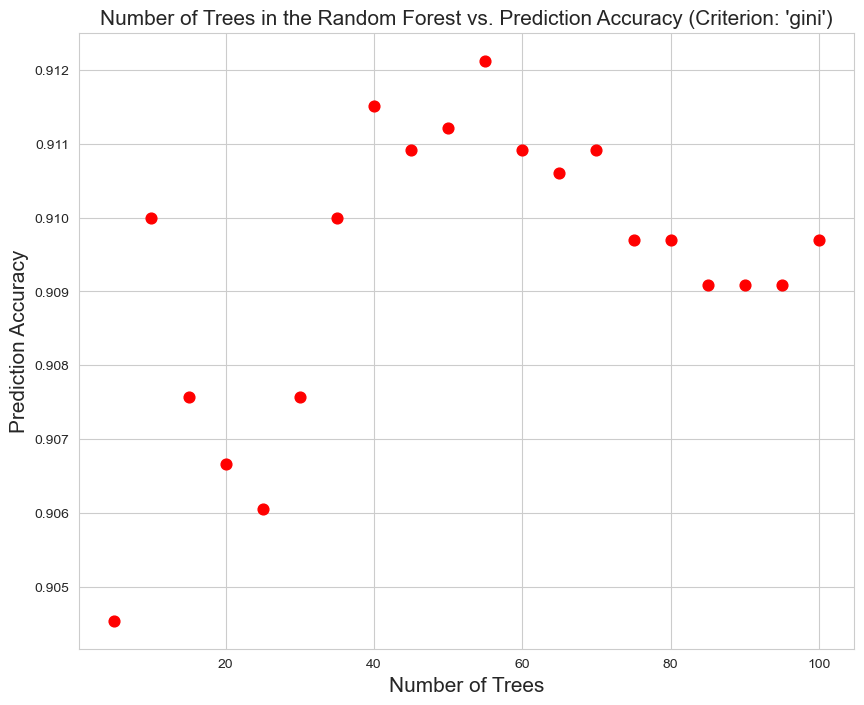

In [238]:
nsimu = 21
accuracy = np.zeros(nsimu)
ntree = np.zeros(nsimu)
for i in range(1, nsimu):
    rfc = RandomForestClassifier(
        n_estimators=i * 5,
        min_samples_split=15,
        max_depth=None,
        criterion='gini',
        random_state=42  
    )
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    
    accuracy[i] = accuracy_score(y_test, rfc_pred)
    ntree[i] = i * 5

plt.figure(figsize=(10, 8))
plt.scatter(ntree[1:], accuracy[1:], s=60, c='red')
plt.title("Number of Trees in the Random Forest vs. Prediction Accuracy (Criterion: 'gini')", fontsize=15)
plt.xlabel("Number of Trees", fontsize=15)
plt.ylabel("Prediction Accuracy", fontsize=15)
plt.grid(True)
plt.show()


## n in entropy

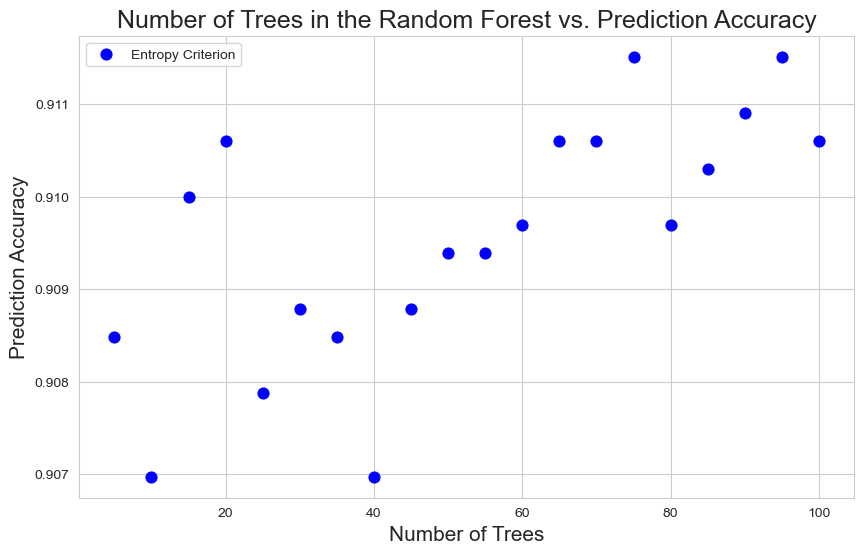

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

nsimu = 21
accuracy = [0] * nsimu
ntree = [0] * nsimu

for i in range(1, nsimu):
    rfc = RandomForestClassifier(
        n_estimators=i * 5,
        min_samples_split=15,
        max_depth=None,
        criterion='entropy',
        random_state=42  
    )
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    

    accuracy[i] = accuracy_score(y_test, rfc_pred)
    ntree[i] = i * 5

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(ntree[1:], accuracy[1:], s=60, c='blue', label="Entropy Criterion")
plt.title("Number of Trees in the Random Forest vs. Prediction Accuracy", fontsize=18)
plt.xlabel("Number of Trees", fontsize=15)
plt.ylabel("Prediction Accuracy", fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

#n in entropy

#### nnn

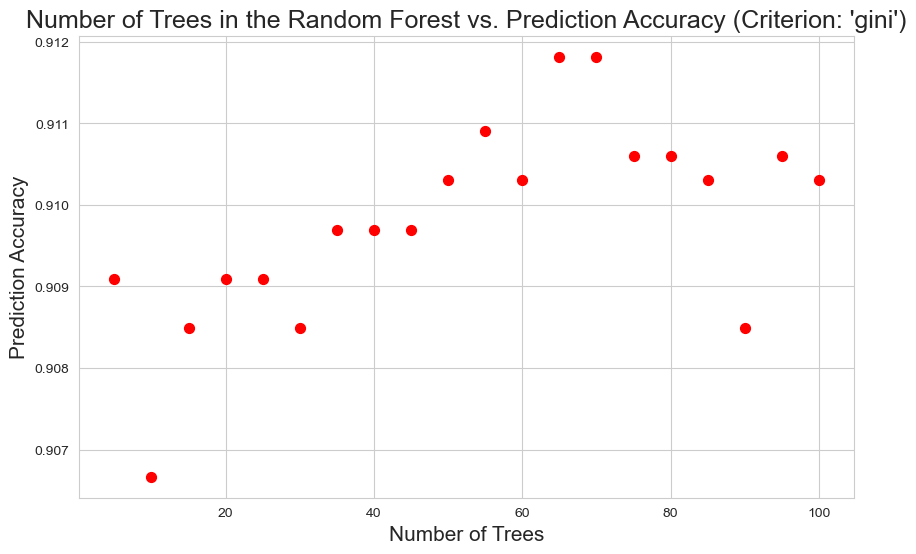

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Initialize parameters
nsimu = 21
accuracy = [0] * nsimu
ntree = [0] * nsimu

# Loop over the number of trees
for i in range(1, nsimu):
    rfc = RandomForestClassifier(
        n_estimators=i * 5,
        min_samples_split=10,
        max_depth=None,
        criterion='gini',
        random_state=42  # Ensures reproducibility
    )
    rfc.fit(x_train, y_train)  # Train the model
    rfc_pred = rfc.predict(x_test)  # Make predictions
    

    accuracy[i] = accuracy_score(y_test, rfc_pred)
    ntree[i] = i * 5

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(ntree[1:], accuracy[1:], s=50, c='red')
plt.title("Number of Trees in the Random Forest vs. Prediction Accuracy (Criterion: 'gini')", fontsize=18)
plt.xlabel("Number of Trees", fontsize=15)
plt.ylabel("Prediction Accuracy", fontsize=15)
plt.grid(True)
plt.show()


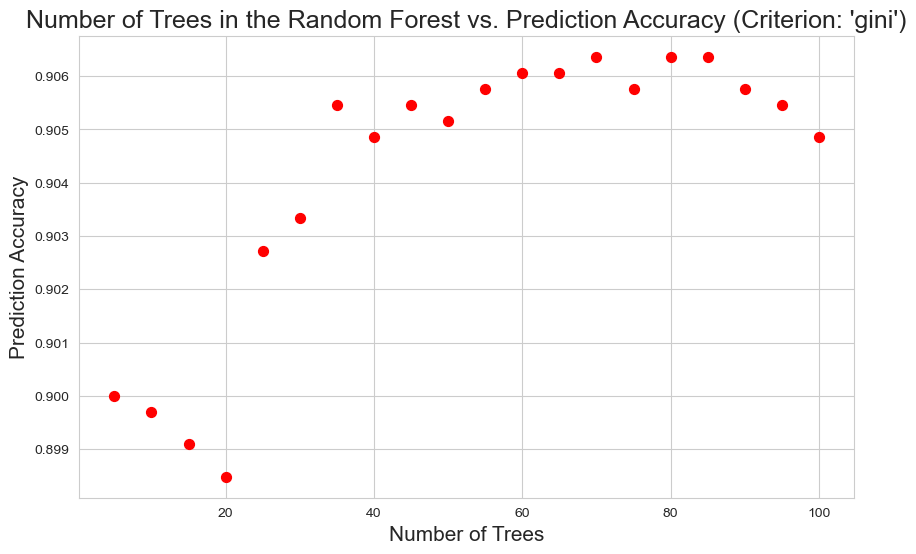

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Initialize parameters
nsimu = 21
accuracy = [0] * nsimu
ntree = [0] * nsimu

# Loop over the number of trees
for i in range(1, nsimu):
    rfc = RandomForestClassifier(
        n_estimators=i * 5,
        min_samples_split=10,
        max_depth=5,
        criterion='gini',
        random_state=42  # Ensures reproducibility
    )
    rfc.fit(x_train, y_train)  # Train the model
    rfc_pred = rfc.predict(x_test)  # Make predictions
    
    # Correct accuracy calculation
    accuracy[i] = accuracy_score(y_test, rfc_pred)
    ntree[i] = i * 5

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(ntree[1:], accuracy[1:], s=50, c='red')
plt.title("Number of Trees in the Random Forest vs. Prediction Accuracy (Criterion: 'gini')", fontsize=18)
plt.xlabel("Number of Trees", fontsize=15)
plt.ylabel("Prediction Accuracy", fontsize=15)
plt.grid(True)
plt.show()


In [ ]:
#5

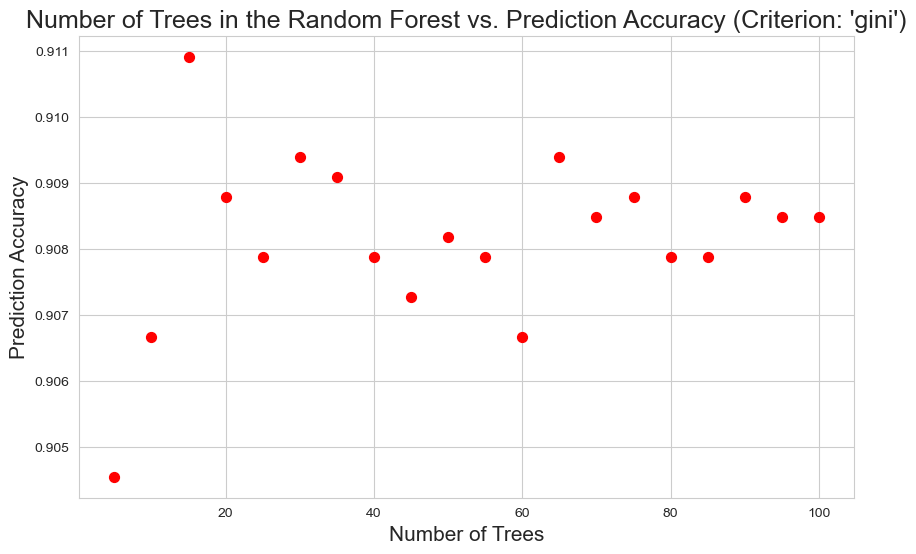

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Initialize parameters
nsimu = 21
accuracy = [0] * nsimu
ntree = [0] * nsimu

# Loop over the number of trees
for i in range(1, nsimu):
    rfc = RandomForestClassifier(
        n_estimators=i * 5,
        min_samples_split=2,
        max_depth=None,
        criterion='gini',
        random_state=42  # Ensures reproducibility
    )
    rfc.fit(x_train, y_train)  # Train the model
    rfc_pred = rfc.predict(x_test)  # Make predictions
    
    # Correct accuracy calculation
    accuracy[i] = accuracy_score(y_test, rfc_pred)
    ntree[i] = i * 5

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(ntree[1:], accuracy[1:], s=50, c='red')
plt.title("Number of Trees in the Random Forest vs. Prediction Accuracy (Criterion: 'gini')", fontsize=18)
plt.xlabel("Number of Trees", fontsize=15)
plt.ylabel("Prediction Accuracy", fontsize=15)
plt.grid(True)
plt.show()


In [ ]:
#6

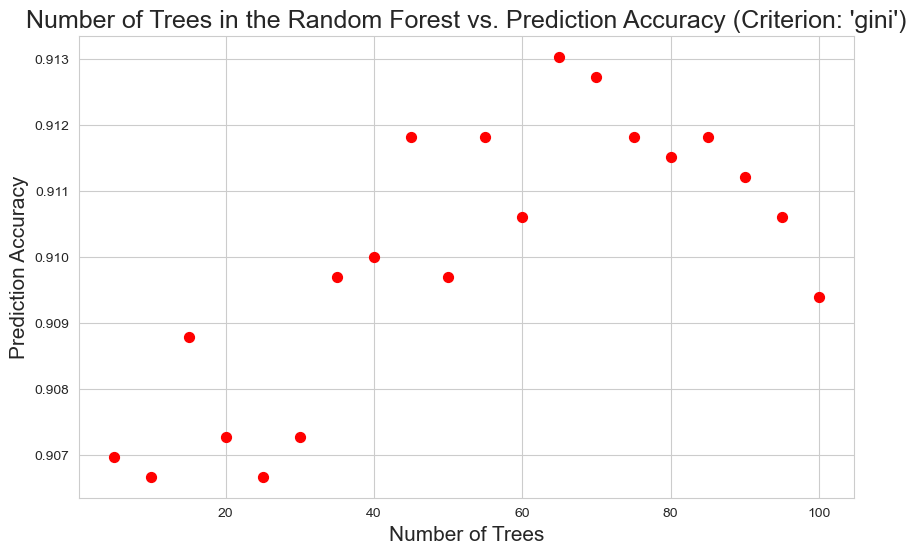

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Initialize parameters
nsimu = 21
accuracy = [0] * nsimu
ntree = [0] * nsimu

# Loop over the number of trees
for i in range(1, nsimu):
    rfc = RandomForestClassifier(
        n_estimators=i * 5,
        min_samples_split=20,
        max_depth=None,
        criterion='gini',
        random_state=42  # Ensures reproducibility
    )
    rfc.fit(x_train, y_train)  # Train the model
    rfc_pred = rfc.predict(x_test)  # Make predictions
    
    # Correct accuracy calculation using rfc_pred
    accuracy[i] = accuracy_score(y_test, rfc_pred)
    ntree[i] = i * 5

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(ntree[1:], accuracy[1:], s=50, c='red')
plt.title("Number of Trees in the Random Forest vs. Prediction Accuracy (Criterion: 'gini')", fontsize=18)
plt.xlabel("Number of Trees", fontsize=15)
plt.ylabel("Prediction Accuracy", fontsize=15)
plt.grid(True)
plt.show()


#  Regression **Analysis**

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [141]:

X_reg = df[['Wind_Speed^2', 'Cloud Cover', 'Precipitation (%)', 'Weather_Index', 'Log_Humidity']]
y_reg = df['Wind Speed']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=132)

# Scaling
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


#### linear Regression 

In [142]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
print("The intercept term of the linear model:", lin_reg.intercept_)
print("The coefficients of the linear model:", lin_reg.coef_)
y_pred_lin_reg = lin_reg.predict(X_test_reg_scaled)



The intercept term of the linear model: 0.20257107154014367
The coefficients of the linear model: [0.12291881 0.00351311 0.00569054 0.00574996 0.0068516 ]


#### Support Vector Regression (SVR)

In [143]:
svr = SVR()
svr.fit(X_train_reg_scaled, y_train_reg)
y_pred_svr = svr.predict(X_test_reg_scaled)


In [144]:
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")


print("Linear Regression Evaluation:")
evaluate_regression(y_test_reg, y_pred_lin_reg)

print("\nSVR Evaluation:")
evaluate_regression(y_test_reg, y_pred_svr)

Linear Regression Evaluation:
MSE: 0.003092147182679715
RMSE: 0.055607078530342836
MAE: 0.044649703651214144

SVR Evaluation:
MSE: 0.004468148858286922
RMSE: 0.06684421334930139
MAE: 0.06062896374096116


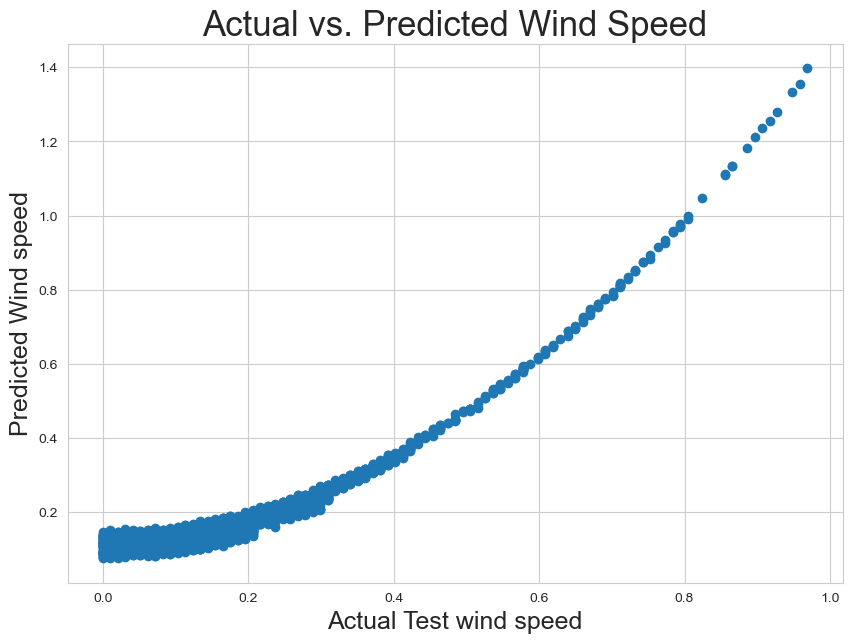

In [145]:
# Generate predictions using the trained model (e.g., linear regression)
predictions = lin_reg.predict(X_test_reg_scaled)

# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.title("Actual vs. Predicted Wind Speed", fontsize=25)
plt.xlabel("Actual Test wind speed", fontsize=18)
plt.ylabel("Predicted Wind speed", fontsize=18)

# Create scatter plot
plt.scatter(x=y_test_reg, y=predictions)

# Display the plot
plt.show()


In [47]:
from sklearn import metrics

# Assuming 'predictions' contains the predicted house prices
r2_value = metrics.r2_score(y_test_reg, predictions)

# Print the R-squared value rounded to 3 decimal places
print("R-squared value of predictions:", round(r2_value, 3))


R-squared value of predictions: 0.851


# **Ensambel Learning**

In [ ]:
pip install xgboost

In [202]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=82)

# Train the model
rf_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9084848484848485
Random Forest Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       837
           1       0.88      0.91      0.90       820
           2       0.94      0.92      0.93       864
           3       0.92      0.91      0.92       779

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
#voting

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define individual classifiers
log_reg = LogisticRegression(random_state=82)
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=82)
random_forest = RandomForestClassifier(n_estimators=50, random_state=82)

# Combine classifiers into Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest)
    ],
    voting='hard'  # Use 'hard' voting (majority voting), or 'soft' if probabilities are used
)

# Train the ensemble
voting_clf.fit(x_train_scaled, y_train)

# Make predictions
y_pred = voting_clf.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")



Ensemble Model Accuracy: 0.91


In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # Updated parameter name
    n_estimators=50,
    max_samples=0.7,
    bootstrap=True,
    random_state=82
)
bagging_clf.fit(x_train_scaled, y_train)
y_pred_bagging = bagging_clf.predict(x_test_scaled)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Model Accuracy: {bagging_accuracy:.2f}")


Bagging Model Accuracy: 0.91


In [218]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=100,     # Number of trees
    learning_rate=0.2,    # Shrinks the contribution of each tree
    max_depth=3,          # Maximum depth of trees
    random_state=82,
    eval_metric='mlogloss' 
)
xgb_clf.fit(x_train_scaled, y_train)
y_pred_xgb = xgb_clf.predict(x_test_scaled)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.2f}")


XGBoost Model Accuracy: 0.91


In [219]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Shrinks the contribution of each tree
    max_depth=3,       # Maximum depth of individual trees
    random_state=82
)
gb_clf.fit(x_train_scaled, y_train)
y_pred_gb = gb_clf.predict(x_test_scaled)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.2f}")


Gradient Boosting Model Accuracy: 0.91
